# IDS Assignment Question No.1

part a

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df15=pd.read_csv('2015.csv')
df16=pd.read_csv('2016.csv')
df17=pd.read_csv('2017.csv')
df18=pd.read_csv('2018.csv')
df19=pd.read_csv('2019.csv')
df=pd.read_csv('earth_surface_temperatures.csv')

part b

In [2]:
health_df = df15.loc[(df15['Health (Life Expectancy)'] >= 0.5) & (df15['Health (Life Expectancy)'] <= 1)]
health_df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
133,Bulgaria,Central and Eastern Europe,134,4.218,0.04828,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991
134,Egypt,Middle East and Northern Africa,135,4.194,0.03260,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195


part c

In [3]:

# Sort by Happiness Score in descending order
df16_ascending = df16.sort_values(by='Happiness Score', ascending=False)
#though in the given dataset,data was arranged,but obviously in future we might be dealing with large unarranged datsets

# Retrieve top 10 countries
happiness_score_10 = df16_ascending.head(10)

print(happiness_score_10[['Country', 'Happiness Score']])
#part 3 done


       Country  Happiness Score
0      Denmark            7.526
1  Switzerland            7.509
2      Iceland            7.501
3       Norway            7.498
4      Finland            7.413
5       Canada            7.404
6  Netherlands            7.339
7  New Zealand            7.334
8    Australia            7.313
9       Sweden            7.291


part d

In [4]:

# firstly use groupby 'Region' and calculate the mean Happiness Score
mean_happiness_by_region = df16.groupby('Region')['Happiness Score'].mean()

# Display or output the results
print(mean_happiness_by_region)
#for those whose mean is same are placed together
#part 4 

Region
Australia and New Zealand          7.323500
Central and Eastern Europe         5.370690
Eastern Asia                       5.624167
Latin America and Caribbean        6.101750
Middle East and Northern Africa    5.386053
North America                      7.254000
Southeastern Asia                  5.338889
Southern Asia                      4.563286
Sub-Saharan Africa                 4.136421
Western Europe                     6.685667
Name: Happiness Score, dtype: float64


part e

In [5]:


# Function to find outliers using Z-Score for all numeric columns
def find_outliers_zscore_manual(df, threshold=2):
    outliers = pd.DataFrame()
    for column in df.select_dtypes(include='number').columns:
        mean = df[column].mean()
        std_dev = df[column].std()
        
        # Calculate Z-Score manually
        z_scores = (df[column] - mean) / std_dev
        
        column_outliers = df[abs(z_scores) > threshold]
        outliers = pd.concat([outliers, column_outliers])
    
    return outliers

# Set the threshold as needed
threshold = 2

# Apply the function to each DataFrame
outliers15 = find_outliers_zscore_manual(df15, threshold=threshold)
outliers16 = find_outliers_zscore_manual(df16, threshold=threshold)
outliers17 = find_outliers_zscore_manual(df17, threshold=threshold)
outliers18 = find_outliers_zscore_manual(df18, threshold=threshold)
outliers19 = find_outliers_zscore_manual(df19, threshold=threshold)



In [6]:



print("Outliers in 2015:")
outliers15


Outliers in 2015:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
39,Suriname,Latin America and Caribbean,40,6.269,0.09811,0.99534,0.97200,0.60820,0.59657,0.13633,0.16991,2.79094
40,Trinidad and Tobago,Latin America and Caribbean,41,6.168,0.10895,1.21183,1.18354,0.61483,0.55884,0.01140,0.31844,2.26882
...,...,...,...,...,...,...,...,...,...,...,...,...
131,Sri Lanka,Southern Asia,132,4.271,0.03751,0.83524,1.01905,0.70806,0.53726,0.09179,0.40828,0.67108
133,Bulgaria,Central and Eastern Europe,134,4.218,0.04828,1.01216,1.10614,0.76649,0.30587,0.00872,0.11921,0.89991
144,Cambodia,Southeastern Asia,145,3.819,0.05069,0.46038,0.62736,0.61114,0.66246,0.07247,0.40359,0.98195
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042


In [7]:
print("\nOutliers in 2016:")
outliers16


Outliers in 2016:


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
155,Syria,Middle East and Northern Africa,156,3.069,2.936,3.202,0.74719,0.14866,0.62994,0.06912,0.17233,0.48397,0.81789
156,Burundi,Sub-Saharan Africa,157,2.905,2.732,3.078,0.06831,0.23442,0.15747,0.04320,0.09419,0.20290,2.10404
35,Qatar,Middle East and Northern Africa,36,6.375,6.178,6.572,1.82427,0.87964,0.71723,0.56679,0.48049,0.32388,1.58224
75,Somalia,Sub-Saharan Africa,76,5.440,5.321,5.559,0.00000,0.33613,0.11466,0.56778,0.31180,0.27225,3.83772
124,Congo (Kinshasa),Sub-Saharan Africa,125,4.272,4.191,4.353,0.05661,0.80676,0.18800,0.15602,0.06075,0.25458,2.74924
131,Malawi,Sub-Saharan Africa,132,4.156,4.041,4.271,0.08709,0.14700,0.29364,0.41430,0.07564,0.30968,2.82859


In [8]:





print("\nOutliers in 2017:")
outliers17




Outliers in 2017:


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
153,Burundi,154,2.905,3.074690,2.735310,0.091623,0.629794,0.151611,0.059901,0.204435,0.084148,1.683024
154,Central African Republic,155,2.693,2.864884,2.521116,0.000000,0.000000,0.018773,0.270842,0.280876,0.056565,2.066005
34,Qatar,35,6.375,6.568477,6.181523,1.870766,1.274297,0.710098,0.604131,0.330474,0.439299,1.145464
92,Somalia,93,5.151,5.242484,5.059516,0.022643,0.721151,0.113989,0.602127,0.291631,0.282410,3.117485
125,Congo (Kinshasa),126,4.280,4.357811,4.202190,0.092102,1.229023,0.191407,0.235961,0.246456,0.060241,2.224959
147,Liberia,148,3.533,3.653756,3.412244,0.119042,0.872118,0.229918,0.332881,0.266550,0.038948,1.673286


In [9]:
print("\nOutliers in 2018:")
outliers18




Outliers in 2018:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076
19,20,United Arab Emirates,6.774,2.096,0.776,0.670,0.284,0.186,NaN
97,98,Somalia,4.982,0.000,0.712,0.115,0.674,0.238,0.282
131,132,Congo (Kinshasa),4.245,0.069,1.136,0.204,0.312,0.197,0.052
148,149,Liberia,3.495,0.076,0.858,0.267,0.419,0.206,0.030
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076
127,128,Georgia,4.340,0.853,0.592,0.643,0.375,0.038,0.215


In [10]:
print("\nOutliers in 2019:")
outliers19


Outliers in 2019:


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091
111,112,Somalia,4.668,0.000,0.698,0.268,0.559,0.243,0.270
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053
140,141,Liberia,3.975,0.073,0.922,0.443,0.370,0.233,0.033
144,145,Burundi,3.775,0.046,0.447,0.380,0.220,0.176,0.180
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
101,102,Benin,4.883,0.393,0.437,0.397,0.349,0.175,0.082
138,139,Togo,4.085,0.275,0.572,0.410,0.293,0.177,0.085


part f

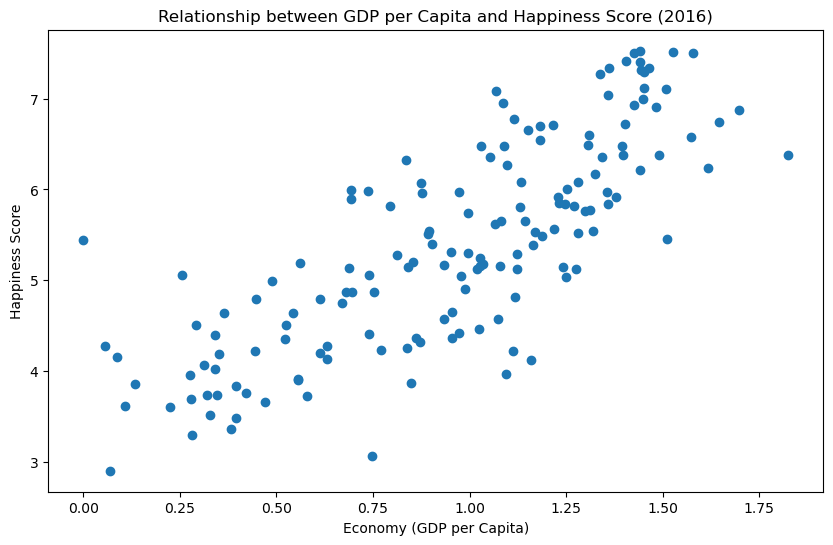

In [11]:

plt.figure(figsize=(10, 6))
plt.scatter(df16['Economy (GDP per Capita)'], df16['Happiness Score'])
plt.title('Relationship between GDP per Capita and Happiness Score (2016)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()


part g

In [12]:
df_new = pd.DataFrame()
# Add 'Country' and 'Region' columns from df15
df_new['Country'] = df15['Country']
df_new['Region'] = df15['Region']

# Add happiness score columns for each year
df_new['2015'] = df15['Happiness Score']
df_new['2016'] = df16['Happiness Score']
df_new['2017'] = df17['Happiness.Score']
df_new['2018'] = df18['Score']
df_new['2019'] = df19['Score']

# Display the new DataFrame
df_new


,Country,Region,2015,2016,2017,2018,2019
0,Switzerland,Western Europe,7.587,7.526,7.537,7.632,7.769
1,Iceland,Western Europe,7.561,7.509,7.522,7.594,7.600
2,Denmark,Western Europe,7.527,7.501,7.504,7.555,7.554
3,Norway,Western Europe,7.522,7.498,7.494,7.495,7.494
4,Canada,North America,7.427,7.413,7.469,7.487,7.488
...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,3.465,3.360,2.905,3.254,3.203
154,Benin,Sub-Saharan Africa,3.340,3.303,2.693,3.083,3.083
155,Syria,Middle East and Northern Africa,3.006,3.069,NaN,2.905,2.853
156,Burundi,Sub-Saharan Africa,2.905,2.905,NaN,NaN,NaN


part h

In [13]:

country1_df = df15[df15['Country'] == 'India']


country2_df = df15[df15['Country'] == 'Pakistan']

# Create a line chart for Country1
plt.plot(country1_df['Years'], country1_df['Happiness Score'], label='India')

plt.plot(country2_df['Years'], country2_df['Happiness Score'], label='Pakistan')

plt.xlabel('Years')
plt.ylabel('Happiness Score')
plt.title('Happiness Score Trend Comparison')


plt.show()


#88888888888888


KeyError: 'Years'

part i

In [20]:

df_filtered = df[(df['Years'] == 2015) | (df['Years'] == 2016)]

# Group by country
grouped_by_country = df_filtered.groupby('Country')
correlations_by_country = grouped_by_country.corr()
max_correlations = correlations_by_country.groupby('Country').max()
avg_correlations = max_correlations.mean(axis=0)
top_two_variables = avg_correlations.nlargest(2)

(top_two_variables)


C:\Users\ma007\AppData\Local\Temp\ipykernel_3108\750203351.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.corr is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  correlations_by_country = grouped_by_country.corr()


Years    1.0
Month    1.0
dtype: float64

part j

In [18]:
economy_df = df15.query('`Economy (GDP per Capita)` < 0.5')
(economy_df)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
76,Kyrgyzstan,Central and Eastern Europe,77,5.286,0.03823,0.47428,1.15115,0.65088,0.43477,0.04232,0.30030,2.23270
84,Zambia,Sub-Saharan Africa,85,5.129,0.06988,0.47038,0.91612,0.29924,0.48827,0.12468,0.19591,2.63430
90,Somaliland region,Sub-Saharan Africa,91,5.057,0.06161,0.18847,0.95152,0.43873,0.46582,0.39928,0.50318,2.11032
93,Mozambique,Sub-Saharan Africa,94,4.971,0.07896,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137
96,Lesotho,Sub-Saharan Africa,97,4.898,0.09438,0.37545,1.04103,0.07612,0.31767,0.12504,0.16388,2.79832
105,Tajikistan,Central and Eastern Europe,106,4.786,0.03198,0.39047,0.85563,0.57379,0.47216,0.15072,0.22974,2.11399
108,Bangladesh,Southern Asia,109,4.694,0.03077,0.39753,0.43106,0.60164,0.40820,0.12569,0.21222,2.51767
114,Zimbabwe,Sub-Saharan Africa,115,4.610,0.04290,0.27100,1.03276,0.33475,0.25861,0.08079,0.18987,2.44191
115,Liberia,Sub-Saharan Africa,116,4.571,0.11068,0.07120,0.78968,0.34201,0.28531,0.06232,0.24362,2.77729
118,Haiti,Latin America and Caribbean,119,4.518,0.07331,0.26673,0.74302,0.38847,0.24425,0.17175,0.46187,2.24173


# IDS Assignment Question No.2

part b

In [14]:

#df=df.fillna(0)
df

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865
...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.621,1.401,0.466
534567,2020,9,Zimbabwe,22.638,1.008,0.246
534568,2020,10,Zimbabwe,24.588,0.458,0.294
534569,2020,11,Zimbabwe,25.934,1.724,1.035


In [15]:

df['Temperature'] = df['Temperature'].astype(float)
df

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865
...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.621,1.401,0.466
534567,2020,9,Zimbabwe,22.638,1.008,0.246
534568,2020,10,Zimbabwe,24.588,0.458,0.294
534569,2020,11,Zimbabwe,25.934,1.724,1.035


part a

In [16]:
m = df['Temperature'].mean()
df['Temperature'].fillna(m, inplace=True)
df

,Years,Month,Country,Temperature,Monthly_variation,Anomaly
0,1848,5,Afghanistan,19.573,-0.297,2.037
1,1848,6,Afghanistan,23.894,-0.796,2.136
2,1848,7,Afghanistan,26.507,-0.113,1.937
3,1848,8,Afghanistan,24.498,-0.462,1.937
4,1848,9,Afghanistan,19.068,-1.272,1.865
...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.621,1.401,0.466
534567,2020,9,Zimbabwe,22.638,1.008,0.246
534568,2020,10,Zimbabwe,24.588,0.458,0.294
534569,2020,11,Zimbabwe,25.934,1.724,1.035


part c

In [17]:

df['Date'] = (df['Month'].astype(str) + '-' + df['Years'].astype(str))
df


,Years,Month,Country,Temperature,Monthly_variation,Anomaly,Date
0,1848,5,Afghanistan,19.573,-0.297,2.037,5-1848
1,1848,6,Afghanistan,23.894,-0.796,2.136,6-1848
2,1848,7,Afghanistan,26.507,-0.113,1.937,7-1848
3,1848,8,Afghanistan,24.498,-0.462,1.937,8-1848
4,1848,9,Afghanistan,19.068,-1.272,1.865,9-1848
...,...,...,...,...,...,...,...
534566,2020,8,Zimbabwe,19.621,1.401,0.466,8-2020
534567,2020,9,Zimbabwe,22.638,1.008,0.246,9-2020
534568,2020,10,Zimbabwe,24.588,0.458,0.294,10-2020
534569,2020,11,Zimbabwe,25.934,1.724,1.035,11-2020


part d

In [ ]:

sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')
plt.show()

# Calculate the Interquartile Range (IQR)
Q1 = df['Temperature'].quantile(0.25)
Q3 = df['Temperature'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]
print("Potential Outliers:\n", outliers)
#44444444444

part e

In [ ]:

temperature_columns = ['Temperature', 'Monthly_variation', 'Anomaly']

summary_statistics = df[temperature_columns].describe()
print("Summary Statistics:\n", summary_statistics)
#5555555555

part f

In [ ]:

country_column = 'Country'
temperature_column = 'Temperature'
average_temperatures = df.groupby(country_column)[temperature_column].mean()
print("Average Temperatures by Country:\n", average_temperatures)
#66666666666

part g

In [ ]:

annual_mean_temperatures = df.groupby(df.index // 12)['Temperature'].mean()
#  histogram
plt.figure(figsize=(12, 6))
plt.hist(annual_mean_temperatures, bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Global Temperature Trend')
plt.xlabel('Average Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
#777777

part h

In [ ]:

country_column = 'Country'
temperature_column = 'Temperature'
df['Month'] = df.index % 12 + 1  # Assuming data is in monthly intervals

avg_temps = df.groupby([country_column, 'Month'])[temperature_column].mean().reset_index()
max_temp_months = avg_temps.loc[avg_temps.groupby([country_column])['Temperature'].idxmax()]
min_temp_months = avg_temps.loc[avg_temps.groupby([country_column])['Temperature'].idxmin()]

print("Months with Highest Temperatures:\n", max_temp_months)
print("\nMonths with Lowest Temperatures:\n", min_temp_months)
#888888888888


part i

In [ ]:

temperature_column = 'Temperature'
anomaly_column = 'Anomaly'

df['Month'] = df.index % 12 + 1  # Assuming data is in monthly intervals
df['Year'] = (df.index // 12) + 1
avg_anomalies = df.groupby(['Month', 'Year'])[anomaly_column].mean().reset_index()
high_anomaly_months = avg_anomalies.loc[avg_anomalies.groupby('Month')['Anomaly'].idxmax()]
low_anomaly_months = avg_anomalies.loc[avg_anomalies.groupby('Month')['Anomaly'].idxmin()]
print("Months with Consistently High Anomalies:\n", high_anomaly_months)
print("\nMonths with Consistently Low Anomalies:\n", low_anomaly_months)
#99999999


part j

In [ ]:

# Calculate cumulative frequencies
sorted_temperatures = df['Temperature'].sort_values()
cumulative_frequencies = sorted_temperatures.cumsum()

# Plot Ogive
plt.figure(figsize=(10, 6))
plt.plot(sorted_temperatures, cumulative_frequencies, marker='o')
plt.title('Ogive - Cumulative Distribution of Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Cumulative Frequency')
plt.grid(True)
plt.show()


part k

In [ ]:
years = np.arange(2015, 2019)
data = {
    'Pakistan': np.random.normal(loc=25, scale=5, size=len(years)),
    'India': np.random.normal(loc=28, scale=6, size=len(years)),
    'Afghanistan': np.random.normal(loc=20, scale=4, size=len(years)),
    'Germany': np.random.normal(loc=12, scale=5, size=len(years)),
    'Russia': np.random.normal(loc=-10, scale=8, size=len(years)),
}

df = pd.DataFrame(data, index=years)


plt.figure(figsize=(10, 6))

for country in df.columns:
    plt.plot(df.index, df[country], label=country)

plt.title('Temperature Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()
#10101010